# AI Observer - Exploratory data analysis

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from pathlib import Path
import copy
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import os
import numpy as np
# from sklearn.model_selection import StratifiedShuffleSplit

In [3]:
MUSH_DIR = Path("../resources/")
IMG_DIR = Path("../images/320")

In [4]:
obs_9_df = pd.read_csv(MUSH_DIR / "full_observations_rank9.csv", index_col=0)
obs_4_df = pd.read_csv(MUSH_DIR / "full_observations_rank4.csv", index_col=0)
img_df = pd.read_csv(MUSH_DIR / "images_observations.csv", sep="\t")
obs_df = pd.read_csv(MUSH_DIR / "full_observations.csv", sep="\t")

## Basic info

### Observations

In [39]:
display(obs_4_df)

,obs_id,thumb_image_id,name_id,when,vote_cache,lat,long,alt,where,north,...,low,is_collection_location,notes,id_y,text_name,author,rank,deprecated,synonym_id,correct_spelling_id
181,2,2.0,3,2004-07-17,2.706040,NaN,NaN,NaN,"Asheville, North Carolina, USA",35.6509,...,650.0,1,---\n:Other: Seen in the exhibit at the 2004 N...,3,Xylaria magnoliae,J.D. Rogers,4,0,NaN,NaN
182,8594,16148.0,3,2007-08-08,2.661230,NaN,NaN,NaN,"Ouida Plantation, West Feliciana Parish, Louis...",39.4596,...,NaN,1,---\n:Other: |2-\n\n\n [admin - Sat Aug 14 02...,3,Xylaria magnoliae,J.D. Rogers,4,0,NaN,NaN
183,8598,16155.0,3,2008-08-01,2.716170,NaN,NaN,NaN,"Walhalla Fish Hatchery, Oconee Co., South Caro...",34.9828,...,NaN,1,---\n:Other: |-\n Beautiful fresh material th...,3,Xylaria magnoliae,J.D. Rogers,4,0,NaN,NaN
184,98309,231063.0,3,2012-06-22,2.547040,NaN,NaN,NaN,"Big Thicket National Preserve, Polk Co., Texas...",30.6196,...,NaN,1,---\n:Other: Found in Big Sandy Creek Unit.\n,3,Xylaria magnoliae,J.D. Rogers,4,0,NaN,NaN
185,135841,335785.0,3,2013-06-08,1.696830,35.3537,-84.0583,1158.0,"Falls Branch Falls Trail, Cherokee National Fo...",35.3731,...,NaN,1,"---\n:Other: ""On fallen magnolia cones\\r\\n""\n",3,Xylaria magnoliae,J.D. Rogers,4,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366992,403219,1157325.0,109633,2020-02-29,2.599850,48.5208,-123.4169,0.0,"Observatory Hill, Victoria, British Columbia, ...",48.5263,...,150.0,1,--- {}\n,109633,"Orbilia ""oc2200229""",NaN,4,0,NaN,NaN
366993,403226,1157348.0,109634,2019-04-23,0.853495,NaN,NaN,NaN,"Coal Center, Pennsylvania, USA",40.0736,...,NaN,1,--- {}\n,109634,Neonectria ditissima,(Tul. & C. Tul.) Samuels & Rossman,4,0,NaN,NaN
366994,403227,1157360.0,109634,2019-04-23,0.853497,NaN,NaN,NaN,"Coal Center, Pennsylvania, USA",40.0736,...,NaN,1,--- {}\n,109634,Neonectria ditissima,(Tul. & C. Tul.) Samuels & Rossman,4,0,NaN,NaN
366995,403232,1157388.0,67233,2020-03-01,1.359420,NaN,NaN,NaN,"Panola Mountain State Park, Rockdale Co., Geor...",33.6459,...,NaN,1,---\n:Other: On _Quercus_ bark in full sun.\n,67233,Lepra pustulata,(Brodo & W.L. Culb.) Lendemer & R.C. Harris,4,0,7277.0,NaN


In [40]:
display(obs_9_df)

,obs_id,thumb_image_id,name_id,when,vote_cache,lat,long,alt,where,north,...,low,is_collection_location,notes,id_y,text_name,author,rank,deprecated,synonym_id,correct_spelling_id
181,2,2.0,3,2004-07-17,2.706040,NaN,NaN,NaN,"Asheville, North Carolina, USA",35.65090,...,650.0,1,---\n:Other: Seen in the exhibit at the 2004 N...,3,Xylaria,J.D. Rogers,9,0,NaN,NaN
182,8594,16148.0,3,2007-08-08,2.661230,NaN,NaN,NaN,"Ouida Plantation, West Feliciana Parish, Louis...",39.45960,...,NaN,1,---\n:Other: |2-\n\n\n [admin - Sat Aug 14 02...,3,Xylaria,J.D. Rogers,9,0,NaN,NaN
183,8598,16155.0,3,2008-08-01,2.716170,NaN,NaN,NaN,"Walhalla Fish Hatchery, Oconee Co., South Caro...",34.98280,...,NaN,1,---\n:Other: |-\n Beautiful fresh material th...,3,Xylaria,J.D. Rogers,9,0,NaN,NaN
184,98309,231063.0,3,2012-06-22,2.547040,NaN,NaN,NaN,"Big Thicket National Preserve, Polk Co., Texas...",30.61960,...,NaN,1,---\n:Other: Found in Big Sandy Creek Unit.\n,3,Xylaria,J.D. Rogers,9,0,NaN,NaN
185,135841,335785.0,3,2013-06-08,1.696830,35.3537,-84.0583,1158.0,"Falls Branch Falls Trail, Cherokee National Fo...",35.37310,...,NaN,1,"---\n:Other: ""On fallen magnolia cones\\r\\n""\n",3,Xylaria,J.D. Rogers,9,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366993,403226,1157348.0,109634,2019-04-23,0.853495,NaN,NaN,NaN,"Coal Center, Pennsylvania, USA",40.07360,...,NaN,1,--- {}\n,109634,Neonectria,(Tul. & C. Tul.) Samuels & Rossman,9,0,NaN,NaN
366994,403227,1157360.0,109634,2019-04-23,0.853497,NaN,NaN,NaN,"Coal Center, Pennsylvania, USA",40.07360,...,NaN,1,--- {}\n,109634,Neonectria,(Tul. & C. Tul.) Samuels & Rossman,9,0,NaN,NaN
366995,403232,1157388.0,67233,2020-03-01,1.359420,NaN,NaN,NaN,"Panola Mountain State Park, Rockdale Co., Geor...",33.64590,...,NaN,1,---\n:Other: On _Quercus_ bark in full sun.\n,67233,Lepra,(Brodo & W.L. Culb.) Lendemer & R.C. Harris,9,0,7277.0,NaN
366996,403281,1157571.0,50525,2020-02-26,2.579300,40.0006,-83.0426,248.0,"Carmack Woods, Columbus, Ohio, USA",40.00240,...,NaN,1,---\n:Other: 'Growing on the underside of a ha...,50525,Hypochnicium,(Bres.) Hallenb.,9,0,NaN,NaN


In [41]:
description_4 = obs_4_df.describe(include="all")
description_4

,obs_id,thumb_image_id,name_id,when,vote_cache,lat,long,alt,where,north,...,low,is_collection_location,notes,id_y,text_name,author,rank,deprecated,synonym_id,correct_spelling_id
count,223132.000000,2.089660e+05,223132.000000,223132,219716.000000,38210.000000,38210.000000,35463.000000,223132,223132.000000,...,26532.000000,223132.000000,222680,223132.000000,223132,220591,223132.0,223132.000000,158586.00000,635.000000
unique,NaN,NaN,NaN,6393,NaN,NaN,NaN,NaN,16891,NaN,...,NaN,NaN,92997,NaN,13044,7071,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,2014-11-23,NaN,NaN,NaN,NaN,"Port Dover, Ontario, Canada",NaN,...,NaN,NaN,--- {}\n,NaN,Amanita muscaria,Peck,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,520,NaN,NaN,NaN,NaN,3801,NaN,...,NaN,NaN,115275,NaN,1557,6669,NaN,NaN,NaN,NaN
mean,198864.188229,5.374890e+05,12744.412796,NaN,1.980732,36.839369,-74.287465,497.080647,NaN,38.653647,...,379.429698,0.974585,NaN,12744.412796,NaN,NaN,4.0,0.076184,3728.12945,27329.215748
std,116636.492021,3.422184e+05,17364.038072,NaN,0.657988,17.143742,58.976763,860.152415,NaN,13.219711,...,542.182307,0.157384,NaN,17364.038072,NaN,NaN,0.0,0.265292,2519.30841,21030.747383
min,2.000000,2.000000e+00,3.000000,NaN,-2.608010,-90.000000,-180.000000,-5809.000000,NaN,-87.135000,...,-86.000000,0.000000,NaN,3.000000,NaN,NaN,4.0,0.000000,1.00000,4.000000
25%,98276.000000,2.313078e+05,668.000000,NaN,1.670890,34.536100,-115.306000,101.000000,NaN,37.374900,...,15.000000,1.000000,NaN,668.000000,NaN,NaN,4.0,0.000000,1886.00000,3047.000000
50%,196054.500000,5.214140e+05,4466.000000,NaN,2.174880,40.481600,-84.435250,256.000000,NaN,40.339700,...,173.000000,1.000000,NaN,4466.000000,NaN,NaN,4.0,0.000000,3437.00000,28830.000000
75%,299063.250000,8.334460e+05,21187.000000,NaN,2.548920,44.503825,-76.601900,623.500000,NaN,43.731900,...,450.000000,1.000000,NaN,21187.000000,NaN,NaN,4.0,0.000000,5584.00000,45057.000000


In [42]:
description_9 = obs_9_df.describe(include="all")
description_9

,obs_id,thumb_image_id,name_id,when,vote_cache,lat,long,alt,where,north,...,low,is_collection_location,notes,id_y,text_name,author,rank,deprecated,synonym_id,correct_spelling_id
count,325083.000000,3.086560e+05,325083.000000,325083,321215.000000,58347.000000,58347.000000,56412.000000,325083,325083.000000,...,40875.000000,325083.000000,324229,325083.000000,325083,319663,325083.0,325083.000000,243766.000000,671.000000
unique,NaN,NaN,NaN,6547,NaN,NaN,NaN,NaN,19229,NaN,...,NaN,NaN,133946,NaN,2449,7494,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,2014-10-11,NaN,NaN,NaN,NaN,"Port Dover, Ontario, Canada",NaN,...,NaN,NaN,--- {}\n,NaN,Amanita,Pers.,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,577,NaN,NaN,NaN,NaN,5832,NaN,...,NaN,NaN,168493,NaN,18949,14667,NaN,NaN,NaN,NaN
mean,204576.792112,5.521679e+05,11750.985773,NaN,1.848576,33.625843,-73.294054,601.538591,NaN,36.410533,...,527.114164,0.979141,NaN,11750.985773,NaN,NaN,9.0,0.062218,4285.841463,27537.438152
std,116047.474579,3.401544e+05,16911.100034,NaN,0.679431,19.308198,57.966181,916.515029,NaN,16.189669,...,654.836684,0.142913,NaN,16911.100034,NaN,NaN,0.0,0.241551,2637.522588,21119.708195
min,2.000000,2.000000e+00,3.000000,NaN,-2.608010,-90.000000,-180.000000,-6487.000000,NaN,-87.643700,...,-86.000000,0.000000,NaN,3.000000,NaN,NaN,9.0,0.000000,1.000000,4.000000
25%,104712.500000,2.516378e+05,557.000000,NaN,1.595705,32.824350,-103.553400,108.000000,NaN,36.062800,...,100.000000,1.000000,NaN,557.000000,NaN,NaN,9.0,0.000000,2612.000000,3165.000000
50%,205046.000000,5.412010e+05,3309.000000,NaN,1.732930,38.530000,-84.071700,268.000000,NaN,39.520000,...,173.000000,1.000000,NaN,3309.000000,NaN,NaN,9.0,0.000000,3989.000000,28830.000000
75%,305409.500000,8.494010e+05,20622.000000,NaN,2.521715,43.757350,-76.600700,1032.000000,NaN,43.138000,...,800.000000,1.000000,NaN,20622.000000,NaN,NaN,9.0,0.000000,6437.000000,45057.000000


In [43]:
print("{} unique species".format(description_4.loc['unique']['text_name']))
print("{} unique genera".format(description_9.loc['unique']['text_name']))
print("{} observations of species".format(len(obs_4_df)))
print("{} observations of genera".format(len(obs_9_df)))

13044 unique species
2449 unique genera
223132 observations of species
325083 observations of genera


### Images

In [5]:
display(img_df)

,image_id,observation_id
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5
...,...,...
1073703,1148528,400818
1073704,1148529,400818
1073705,1148530,400818
1073706,1148531,400818


In [6]:
print(f"{len(img_df)} images.")
print(f"On average, {len(img_df) / len(obs_df)} images per observation.")

1073708 images.
On average, 2.9256508209854006 images per observation.


In [8]:
from collections import Counter

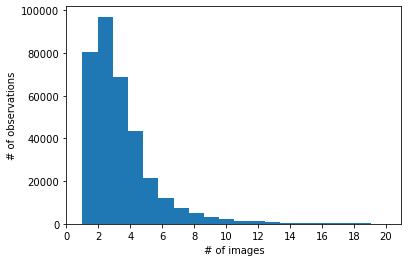

In [15]:
plt.hist([v for v in Counter(img_df.observation_id.values).values() if v <=20], bins=20)
plt.xticks(range(0, 21, 2))
plt.xlabel("# of images")
plt.ylabel("# of observations");

## Plots

In [46]:
img_4_df = pd.merge(left=obs_4_df, right=img_df, left_on="obs_id", right_on="observation_id")
img_9_df = pd.merge(left=obs_9_df, right=img_df, left_on="obs_id", right_on="observation_id")

### Vote distribution

#### Species

Min vote_cache: -2.60801


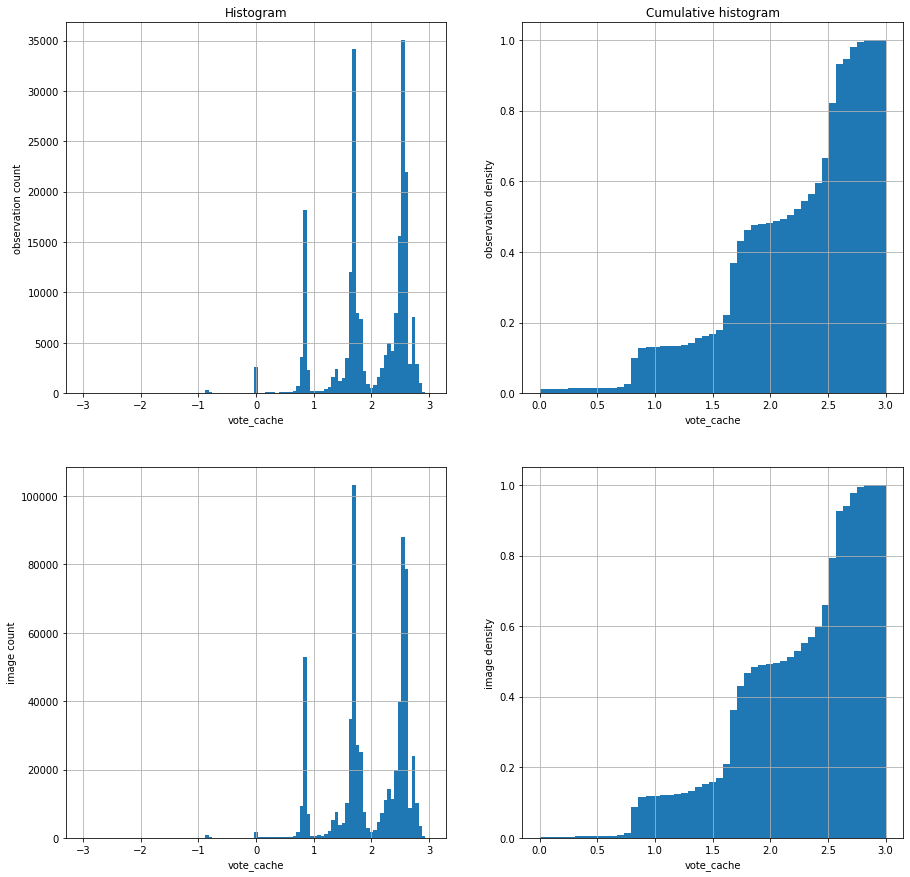

In [54]:
print(f"Min vote_cache: {obs_4_df.vote_cache.min()}")
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
obs_4_df.vote_cache.hist(bins=np.linspace(-3, 3, 100), ax=ax[0,0])
obs_4_df.vote_cache.hist(bins=np.linspace(0, 3, 50), ax=ax[0,1], cumulative=True, density=True)
img_4_df.vote_cache.hist(bins=np.linspace(-3, 3, 100), ax=ax[1,0])
img_4_df.vote_cache.hist(bins=np.linspace(0, 3, 50), ax=ax[1,1], cumulative=True, density=True)
for a in ax.flatten():
    a.set_xlabel("vote_cache"), a.set_xlabel("vote_cache")
ax[0,0].set_title("Histogram"), ax[0,1].set_title("Cumulative histogram");
ax[0,0].set_ylabel("observation count"), ax[0,1].set_ylabel("observation density")
ax[1,0].set_ylabel("image count"), ax[1,1].set_ylabel("image density");

- More than 80% of the observations/images have a `vote_cache`$>1.5$.

#### Genera

Min vote_cache: -2.60801


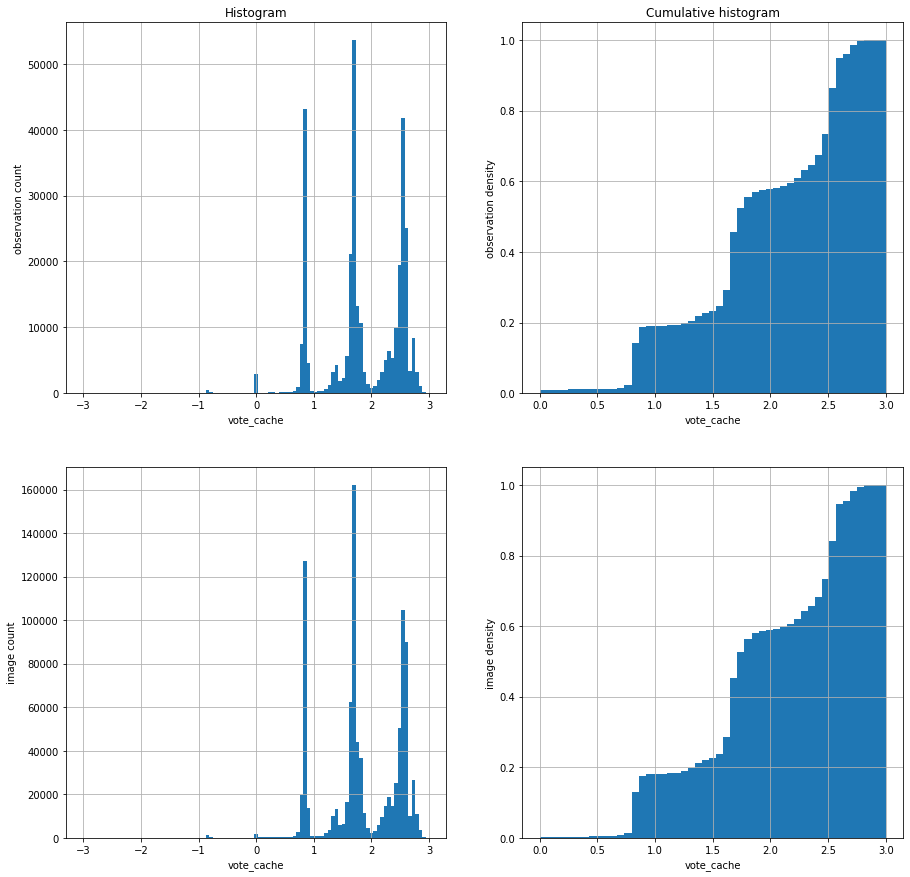

In [57]:
print(f"Min vote_cache: {obs_9_df.vote_cache.min()}")
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
obs_9_df.vote_cache.hist(bins=np.linspace(-3, 3, 100), ax=ax[0,0])
obs_9_df.vote_cache.hist(bins=np.linspace(0, 3, 50), ax=ax[0,1], cumulative=True, density=True)
img_9_df.vote_cache.hist(bins=np.linspace(-3, 3, 100), ax=ax[1,0])
img_9_df.vote_cache.hist(bins=np.linspace(0, 3, 50), ax=ax[1,1], cumulative=True, density=True)
for a in ax.flatten():
    a.set_xlabel("vote_cache")
ax[0,0].set_title("Histogram"), ax[0,1].set_title("Cumulative histogram");
ax[0,0].set_ylabel("observation count"), ax[0,1].set_ylabel("observation density")
ax[1,0].set_ylabel("image count"), ax[1,1].set_ylabel("image density");

- More than 75% of the observations/images have a `vote_cache`$>1.5$.

### Images per species

1234 species having more than 100 images.
132 genera having more than 1000 images.


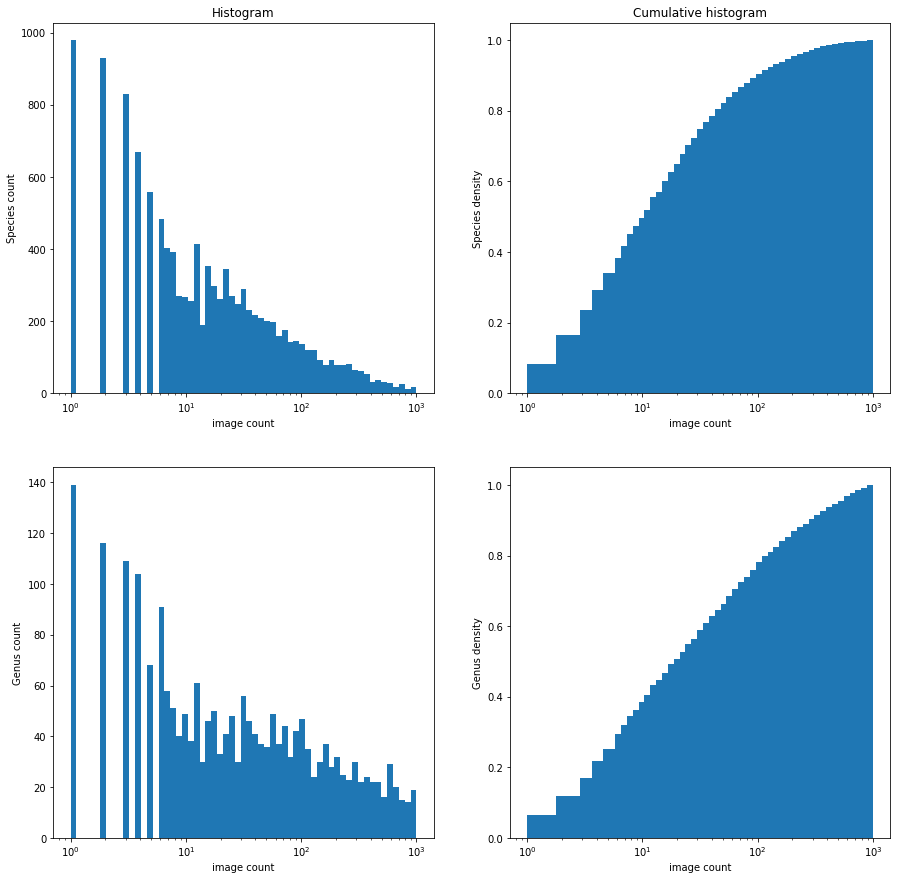

In [84]:
vote_mask_4 = img_4_df.vote_cache > 1.5
species2counts = img_4_df[vote_mask_4].groupby("text_name").count().sort_values("image_id")
to_plot_4 = species2counts["image_id"].values
vote_mask_9 = img_9_df.vote_cache > 1.5
genera2counts = img_9_df[vote_mask_9].groupby("text_name").count().sort_values("image_id")
to_plot_9 = genera2counts["image_id"].values

fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax[0,0].hist(to_plot_4, bins=np.logspace(0, 3, num=60))
ax[0,1].hist(to_plot_4, bins=np.logspace(0, 3, num=60), cumulative=True, density=True)
ax[1,0].hist(to_plot_9, bins=np.logspace(0, 3, num=60))
ax[1,1].hist(to_plot_9, bins=np.logspace(0, 3, num=60), cumulative=True, density=True)
for a in ax.flatten():
    a.set_xlabel("image count")
    a.set_xscale('log')
ax[0,0].set_title("Histogram"), ax[0,1].set_title("Cumulative histogram")
ax[0,0].set_ylabel("Species count"), ax[0,1].set_ylabel("Species density")
ax[1,0].set_ylabel("Genus count"), ax[1,1].set_ylabel("Genus density")

print(f"{len(to_plot_4[to_plot_4 > 100])} species having more than 100 images.")
print(f"{len(to_plot_9[to_plot_9 > 1000])} genera having more than 1000 images.");

- Most species/genera have very few images

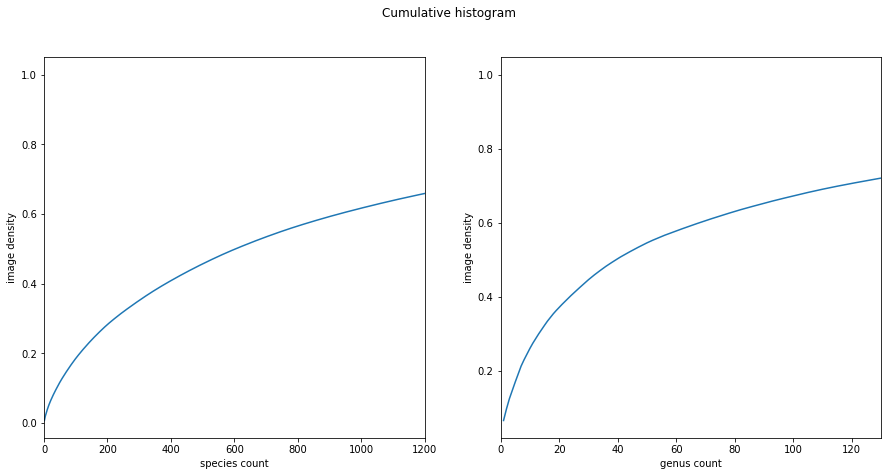

In [88]:
species2counts = img_4_df[vote_mask_4].groupby("text_name").count().sort_values("image_id", ascending=False)
to_plot_4 = species2counts["image_id"].values
genera2counts = img_9_df[vote_mask_9].groupby("text_name").count().sort_values("image_id", ascending=False)
to_plot_9 = genera2counts["image_id"].values

fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].plot(np.arange(len(to_plot_4)) + 1, to_plot_4.cumsum() / to_plot_4.sum())
ax[1].plot(np.arange(len(to_plot_9)) + 1, to_plot_9.cumsum() / to_plot_9.sum())

ax[0].set_xlabel("species count"), ax[1].set_xlabel("genus count")
for a in ax.flatten():
    a.set_ylabel("image density")
fig.suptitle("Cumulative histogram")
ax[0].set_xlim([0, 1200])
ax[1].set_xlim([0, 130]);

- 1200 species are responsible for about 65% of the valid images of species.
- 100 genera are responsible for about 75% of the valid images of genera.